In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

/home/vrtx26/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

# Loading Dataset

In [21]:
# X, y, ID = data_loader.load_dataset()
X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
                                    y_path='data/y_labels_4096.csv',
                                    ID_path='data/IDs_4096.csv')

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

data loaded in 0.027125835418701172ms
          0         1         2         3         4         5         6  \
0  0.319181 -0.522682 -0.597526 -1.407693 -0.610477 -0.186076 -1.417255   
1 -0.502729 -0.332831  0.096766 -0.967017 -0.040431 -0.160043 -0.824728   
2 -0.906320  0.618802 -0.169045 -0.580832 -0.001135  1.000693 -0.013734   
3  0.897421 -1.357681 -0.065064 -1.938891 -0.333115 -0.361470 -1.352050   
4  0.493191 -1.505473 -0.693307 -1.629228 -0.459147 -0.437445 -1.302624   

          7         8         9  ...        70        71        72        73  \
0 -1.072452 -1.731274  0.549044  ...  0.161543  1.713000  0.981261  0.210663   
1 -0.501110 -0.918544  0.271237  ...  2.114454  1.614392  0.273066  0.401989   
2 -0.397151 -0.764400  0.588600  ...  1.191591  2.097101  2.183672  2.050057   
3 -0.770320 -1.951237 -0.027059  ... -0.269909 -0.522271  0.391216  0.328256   
4 -0.237175 -1.215223  0.284750  ... -0.938816  0.149529 -0.120720 -0.135068   

         74        75        7

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [22]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.93it/s]

UAR = 0.312
C = 0.100000, gamma = 0.000316


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.99it/s]

UAR = 0.318
C = 0.100000, gamma = 0.000527


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.09it/s]

UAR = 0.323
C = 0.100000, gamma = 0.000880


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.41it/s]

UAR = 0.327
C = 0.100000, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.97it/s]

UAR = 0.338
C = 0.100000, gamma = 0.002448


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.09it/s]

UAR = 0.354
C = 0.100000, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.92it/s]

UAR = 0.368
C = 0.100000, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.86it/s]

UAR = 0.369
C = 0.100000, gamma = 0.011365


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.97it/s]

UAR = 0.353


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.91it/s]

UAR = 0.299


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.92it/s]

UAR = 0.312


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.91it/s]

UAR = 0.317


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.64it/s]

UAR = 0.322


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.11it/s]

UAR = 0.337


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.33it/s]

UAR = 0.359


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.23it/s]

UAR = 0.375
C = 0.187382, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.76it/s]

UAR = 0.390
C = 0.187382, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.71it/s]

UAR = 0.383


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.31it/s]

UAR = 0.372


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.50it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.43it/s]

UAR = 0.311


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.51it/s]

UAR = 0.324


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.39it/s]

UAR = 0.339


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.89it/s]

UAR = 0.365


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.56it/s]

UAR = 0.379


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.07it/s]

UAR = 0.398
C = 0.351119, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.51it/s]

UAR = 0.406
C = 0.351119, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.27it/s]

UAR = 0.409
C = 0.351119, gamma = 0.011365


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.86it/s]

UAR = 0.400


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.09it/s]

UAR = 0.357


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.84it/s]

UAR = 0.324


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.21it/s]

UAR = 0.348


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.81it/s]

UAR = 0.367


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.89it/s]

UAR = 0.385


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.32it/s]

UAR = 0.410
C = 0.657933, gamma = 0.002448


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.53it/s]

UAR = 0.410
C = 0.657933, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.87it/s]

UAR = 0.430
C = 0.657933, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.02it/s]

UAR = 0.421


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.94it/s]

UAR = 0.415


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.79it/s]

UAR = 0.393


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00, 10.00it/s]

UAR = 0.349


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.63it/s]

UAR = 0.373


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.93it/s]

UAR = 0.388


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.13it/s]

UAR = 0.411


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.22it/s]

UAR = 0.417


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.09it/s]

UAR = 0.448
C = 1.232847, gamma = 0.004084


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.11it/s]

UAR = 0.441


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.77it/s]

UAR = 0.444


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.70it/s]

UAR = 0.436


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.43it/s]

UAR = 0.395


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.55it/s]

UAR = 0.376


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.59it/s]

UAR = 0.393


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.20it/s]

UAR = 0.406


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.25it/s]

UAR = 0.416


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.83it/s]

UAR = 0.449
C = 2.310130, gamma = 0.002448


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.45it/s]

UAR = 0.450
C = 2.310130, gamma = 0.004084


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.00it/s]

UAR = 0.452
C = 2.310130, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.58it/s]

UAR = 0.462
C = 2.310130, gamma = 0.011365


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.16it/s]

UAR = 0.440


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.02it/s]

UAR = 0.393


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.14it/s]

UAR = 0.400


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.42it/s]

UAR = 0.406


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.28it/s]

UAR = 0.424


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.44it/s]

UAR = 0.450


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.13it/s]

UAR = 0.450


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.92it/s]

UAR = 0.467
C = 4.328761, gamma = 0.004084


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.79it/s]

UAR = 0.465


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.73it/s]

UAR = 0.464


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.57it/s]

UAR = 0.428


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.27it/s]

UAR = 0.391


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.01it/s]

UAR = 0.399


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.55it/s]

UAR = 0.432


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.49it/s]

UAR = 0.453


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.17it/s]

UAR = 0.461


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.71it/s]

UAR = 0.467


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.94it/s]

UAR = 0.465


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.68it/s]

UAR = 0.468
C = 8.111308, gamma = 0.006813


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.70it/s]

UAR = 0.453


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.56it/s]

UAR = 0.432


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.54it/s]

UAR = 0.391


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.64it/s]

UAR = 0.436


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.56it/s]

UAR = 0.457


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.10it/s]

UAR = 0.460


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.21it/s]

UAR = 0.460


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.22it/s]

UAR = 0.457


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.60it/s]

UAR = 0.464


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.25it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.04it/s]

UAR = 0.450


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.32it/s]

UAR = 0.431


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.34it/s]

UAR = 0.391


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.64it/s]

UAR = 0.456


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.74it/s]

UAR = 0.458


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.60it/s]

UAR = 0.462


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.60it/s]

UAR = 0.458


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.60it/s]

UAR = 0.455


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.54it/s]

UAR = 0.464


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.74it/s]

UAR = 0.452


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.65it/s]

UAR = 0.450


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.97it/s]

UAR = 0.431


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.13it/s]

UAR = 0.391


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.52it/s]

UAR = 0.453


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.34it/s]

UAR = 0.459


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.38it/s]

UAR = 0.451


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.57it/s]

UAR = 0.451


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.15it/s]

UAR = 0.464


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.98it/s]

UAR = 0.456


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.49it/s]

UAR = 0.453


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.97it/s]

UAR = 0.450


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.39it/s]

UAR = 0.431


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.99it/s]

UAR = 0.391


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.27it/s]

UAR = 0.454


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.02it/s]

UAR = 0.453


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.38it/s]

UAR = 0.454


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.56it/s]

UAR = 0.451


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.64it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.89it/s]

UAR = 0.464


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.11it/s]

UAR = 0.453


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.81it/s]

UAR = 0.450


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.58it/s]

UAR = 0.431


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.98it/s]

UAR = 0.391
UAR_best = 0.468, C_best = 8.111308, gamma_best = 0.006813


## Result visualization

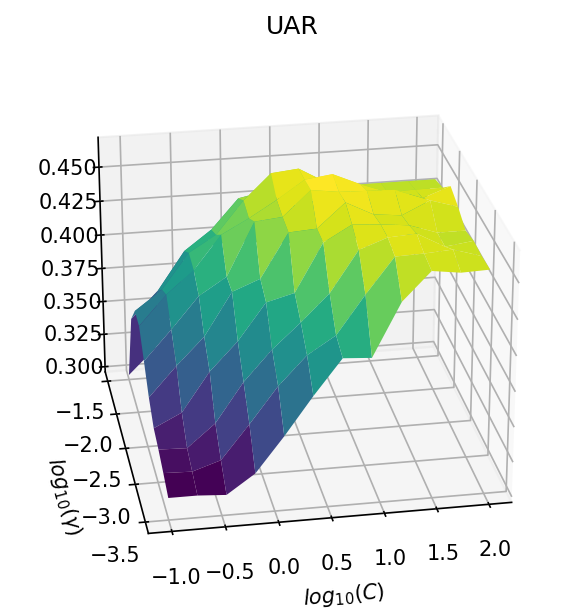

In [23]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')                
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
ax.set_title('UAR')
ax.view_init(25, 260)
plt.show()

# Confusion matrix

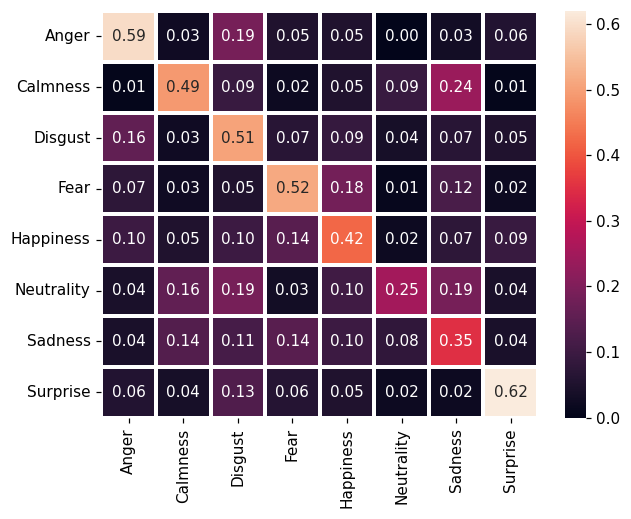

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [25]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)